### FrontPageData Plots
Visualizing correllation of web search results position & click-through rate

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
%run chart_theme.py

In [3]:
file = pd.read_csv('CTR_dataset_final.csv')

In [4]:
filtered = file[(file.position <= 10) & (file.impressions > 100) & (file.clicks >= 25)]

In [5]:
filtered.head()

,clicks,impressions,ctr,position
0,23577,34451,0.684363,1.002641
1,10834,142149,0.076216,6.119157
2,8763,37676,0.232588,2.349321
3,7548,36091,0.209138,3.464077
4,6834,51417,0.132913,2.795360


---

#### Bar Plot:

In [6]:
avg_ctrs = []
for i in range(1,10,1):
    df = filtered[(filtered.position >= i) & (filtered.position < i + 1)]
    avg_ctrs.append(df.ctr.mean().round(3))

In [7]:
ctr_pos_df = pd.DataFrame({'Search Position':range(1,10,1), 'Mean CTR':avg_ctrs})
ctr_pos_df['Mean CTR Perc'] = ctr_pos_df['Mean CTR'].apply(lambda x:x*100).round(1).astype(str) + '%'

ctr_pos_df

,Search Position,Mean CTR,Mean CTR Perc
0,1,0.398,39.8%
1,2,0.255,25.5%
2,3,0.178,17.8%
3,4,0.125,12.5%
4,5,0.092,9.2%
5,6,0.061,6.1%
6,7,0.050,5.0%
7,8,0.030,3.0%
8,9,0.025,2.5%


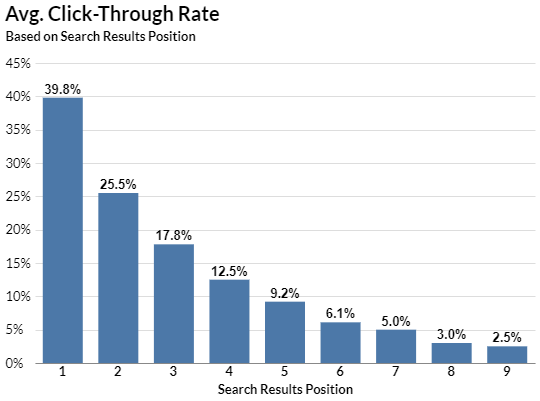

In [8]:
base = alt.Chart(ctr_pos_df).mark_bar(size=40).encode(
    x=alt.X('Search Position:O', title='Search Results Position'),
    y=alt.Y('Mean CTR', title='Based on Search Results Position', axis=alt.Axis(format='.0%'), scale=alt.Scale(domain=(0, .45)))
    )

text = alt.Chart(ctr_pos_df).mark_text(
    size=13,
    fontWeight='bold',
    dy=-8
    ).encode(
    x=alt.X('Search Position:O'),
    y=alt.Y('Mean CTR'),
    text='Mean CTR Perc')

bar = (base + text).properties(title='Avg. Click-Through Rate')
bar

In [9]:
bar.save('bar.png', scale_factor=3)

---

#### Scatter Plot:

In [10]:
avgs = []
for i in range(2,11):
    df = filtered[(filtered.position < i) & (filtered.position > i-1)]
    avgs.append(df.ctr.mean().round(3))

In [11]:
line_df = pd.DataFrame({'position':range(1,10), 'avg_ctr':avgs})
line_df

,position,avg_ctr
0,1,0.368
1,2,0.255
2,3,0.178
3,4,0.125
4,5,0.092
5,6,0.061
6,7,0.050
7,8,0.030
8,9,0.025


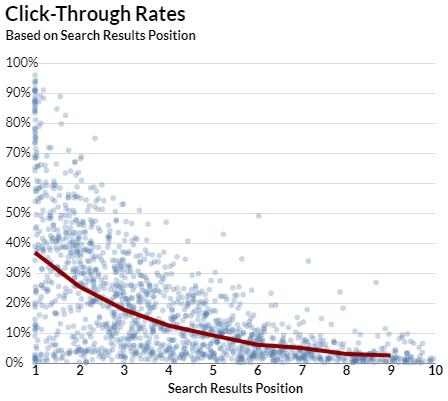

In [12]:
base = alt.Chart(filtered).encode(
x=alt.X('position', title='Search Results Position', scale=alt.Scale(zero=False)),
y=alt.Y('ctr', title=None, axis=alt.Axis(format='.0%')))

points = base.mark_circle(opacity=.3)

line = alt.Chart(line_df).mark_line(size=4, color='darkred').encode(
x=alt.X('position', scale=alt.Scale(zero=False)),
y=alt.Y('avg_ctr', title='Based on Search Results Position'))

points_line = (points + line).properties(title='Click-Through Rates', width=400)
points_line

In [13]:
points_line.save('scatter_line.png', scale_factor=3)

---

#### Box & Whisker Plot:

In [14]:
combined = pd.DataFrame()
for i in range(2,11):
    df = filtered[(filtered.position < i) & (filtered.position >= i-1)]
    df['Bin'] = np.full(len(df), i-1)
    combined = pd.concat([combined, df])

C:\Users\Mahmoud\Miniconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
combined.head()

,clicks,impressions,ctr,position,Bin
0,23577,34451,0.684363,1.002641,1
7,4974,26812,0.185514,1.789833,1
9,4707,11014,0.427365,1.042037,1
14,3827,32282,0.118549,1.002974,1
16,3621,9636,0.375778,1.501142,1


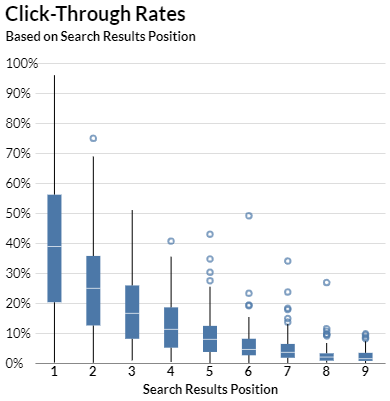

In [16]:
box = alt.Chart(combined).mark_boxplot().encode(
    x=alt.X('Bin:O', title='Search Results Position'),
    y=alt.Y('ctr:Q', axis=alt.Axis(format='.0%'), title='Based on Search Results Position')
).properties(title='Click-Through Rates', width=350)

box

In [17]:
box.save('box.png', scale_factor=3)

---

#### Confidence Interval:

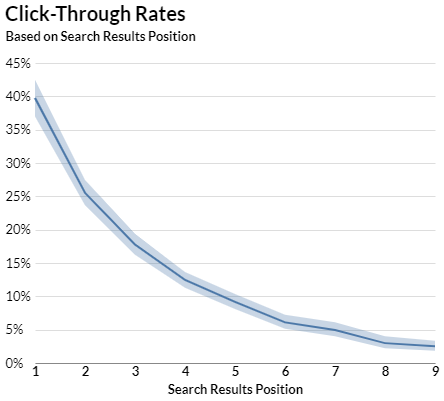

In [18]:
con_int = alt.Chart(combined).mark_errorband(extent='ci').encode(
    x=alt.X('Bin', title='Search Results Position'),
    y=alt.Y('ctr', title='Based on Search Results Position', axis=alt.Axis(format='.0%'))
)

line = alt.Chart(combined).mark_line().encode(
    x=alt.X('Bin', title=None),
    y=alt.Y('mean(ctr)'))

line_con_int = (con_int + line).properties(width=400, title='Click-Through Rates')
line_con_int

In [19]:
line_con_int.save('conf_interval.png', scale_factor=3)